### Conway’s Game of Life
Conway’s Game of Life (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a classic example of a cellular automaton devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an m-by-n board, which we will represent as an m-by-n matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a 1) or dead (which we will represent as a 0). At each step, the board evolves according to a few simple rules:

• A live cell with fewer than two live neighbors becomes a dead cell.   
• A live cell with more than three live neighbors becomes a dead cell.   
• A live cell with two or three live neighbors remains alive.  
• A dead cell with exactly three live neighbors becomes alive.  
• All other dead cells remain dead.  

   The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upper- left, lower-left, upper-right and lower-right. We will follow the convention that the board is toroidal, so that using matrix-like notation (i.e., the cell (0,0) is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell (0,0) is (m − 1,0), the right neighbor of the cell (m − 1,n − 1) is (m − 1,0), etc. That is, the board “wraps around”. 
   
   Note: you are not required to use this matrix-like indexing. It’s just what I chose to use to explain the toroidal property.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import copy
from matplotlib import animation
import time
from IPython.display import display,clear_output

%matplotlib inline

1. Write a function <span style="font-family:Courier; font-size:1em;">is_valid_board</span> that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and returns a Python Boolean that is True if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy ndarray with all entries either 0.0 and 1.0.

In [2]:
def is_valid_board(a):
    if not isinstance(a, np.ndarray):
        print("Validation Failed: Input is not a NumPy ndarray.")
        return False
    
    if a.ndim != 2:
        print(f"Validation Failed: Array has {a.ndim} dimensions; expected 2.")
        return False

    if not np.issubdtype(a.dtype, np.number):
        print(f"Validation Failed: Array data type {a.dtype} is not numeric.")
        return False
    
    unique_values = np.unique(a)
    valid_values = {0.0, 1.0} if np.issubdtype(a.dtype, np.floating) else {0, 1}
    unique_set = set(unique_values.tolist())
    
    if not unique_set.issubset(valid_values):
        print(f"Validation Failed: Array contains values outside {valid_values}. Found values: {unique_set}")
        return False
    return True

In [3]:
a = np.array([[0,1,0,1], [1,0,0,1], [1,1,0,0]])
is_valid_board(a)


True

In [4]:
b = np.array([[0,1,1,1], [0,0,0,3], [1,1,0,0]])
is_valid_board(b)

Validation Failed: Array contains values outside {0, 1}. Found values: {0, 1, 3}


False

2. Write a function called <span style="font-family:Courier; font-size:1em;">gol_step</span> that takes an m-by-n numpy array as its argument and returns another numpy array of the same size (i.e., also m-by-n), corresponding to the board at the next step of the game. 

    Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [10]:
def gol_step(a):
    if not is_valid_board(a):
        raise ValueError("Invalid Game of Life board. The board must be a 2D NumPy array with all elements 0 or 1.")
    
    # Count the number of alive neighbors for each cell using toroidal wrapping
    # We achieve this by shifting the board in all eight directions and summing the results
    neighbors = (
        np.roll(np.roll(a, 1, 0), 1, 1) +  # Top-Left
        np.roll(a, 1, 0) +                # Top
        np.roll(np.roll(a, 1, 0), -1, 1) + # Top-Right
        np.roll(a, -1, 0) +               # Bottom
        np.roll(np.roll(a, -1, 0), 1, 1) + # Bottom-Left
        np.roll(np.roll(a, -1, 0), -1, 1) +# Bottom-Right
        np.roll(a, 1, 1) +                # Left
        np.roll(a, -1, 1)                  # Right
    )

    next_board = np.zeros(a.shape, dtype=a.dtype)
    
    # Apply rules for live cells
    # Cells that are currently alive and have 2 or 3 neighbors stay alive
    live_cells = (a == 1)
    survive = live_cells & ((neighbors == 2) | (neighbors == 3))
    next_board[survive] = 1
    
    # Apply rules for dead cells
    # Cells that are currently dead and have exactly 3 neighbors become alive
    dead_cells = (a == 0)
    birth = dead_cells & (neighbors == 3)
    next_board[birth] = 1
    
    return next_board

In [12]:
x = np.array([[0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0]])
y = gol_step(x)
y


array([[0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

3. Write a function called draw_gol_board that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and draws the board as an m-by-n set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should not have any grid lines, nor should it have any axis labels or axis ticks. 

    Hint: see the functions plt.xticks() and plt.yticks() for changing axis ticks. 
    
    Hint: you may find the function plt.get_cmap to be useful for working with the matplotlib Colormap objects.

In [13]:
def draw_gol_board(a):
    if not is_valid_board(a):
        raise ValueError("Invalid Game of Life board. The board must be a 2D NumPy array with all elements 0 or 1.")
    
    # Define the color map: 0 -> white, 1 -> black
    cmap = plt.colors.ListedColormap(['white', 'black'])
    
    # Create the plot
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    plt.imshow(a, cmap='binary', interpolation='nearest')
    
    # Remove grid lines, axis labels, and ticks
    plt.grid(False)
    plt.axis('off')
    
    # Display the plot
    plt.show()

In [16]:
def draw_gol_board(a):    
    if not is_valid_board(a):  
        raise ValueError("Invalid Game of Life board. The board must be a 2D NumPy array with all elements 0 or 1.")

    plt.figure(figsize=(6, 6)) 
    plt.imshow(a, cmap='binary', interpolation='nearest')
    
    # Remove grid lines, axis labels, and ticks
    plt.grid(False)
    plt.axis('off')
    
    # Display the plot
    plt.show()

In [14]:
x

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]])

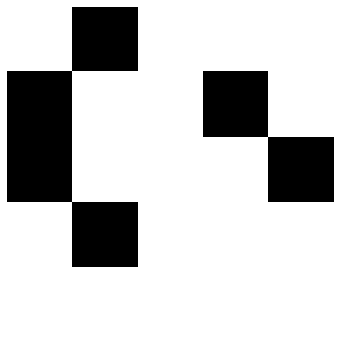

In [17]:
board = draw_gol_board(x)

4.  Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this:
    
    Plot this 20-by-20 board using draw_gol_board.

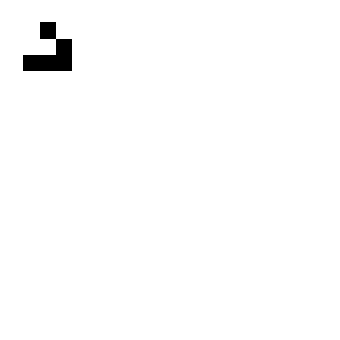

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
board = np.zeros((20, 20), dtype=int)
alive_cells = [
    (1, 2),  # Third row, second column
    (2, 3),  # Fourth row, third column
    (3, 1),  # Second row, fourth column
    (3, 2),  # Third row, fourth column
    (3, 3)   # Fourth row, fourth column
]

# Activate the specified cells
for row, col in alive_cells:
    board[row, col] = 1
draw_gol_board(board)
board


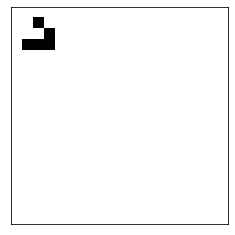

5. Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called a glider, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

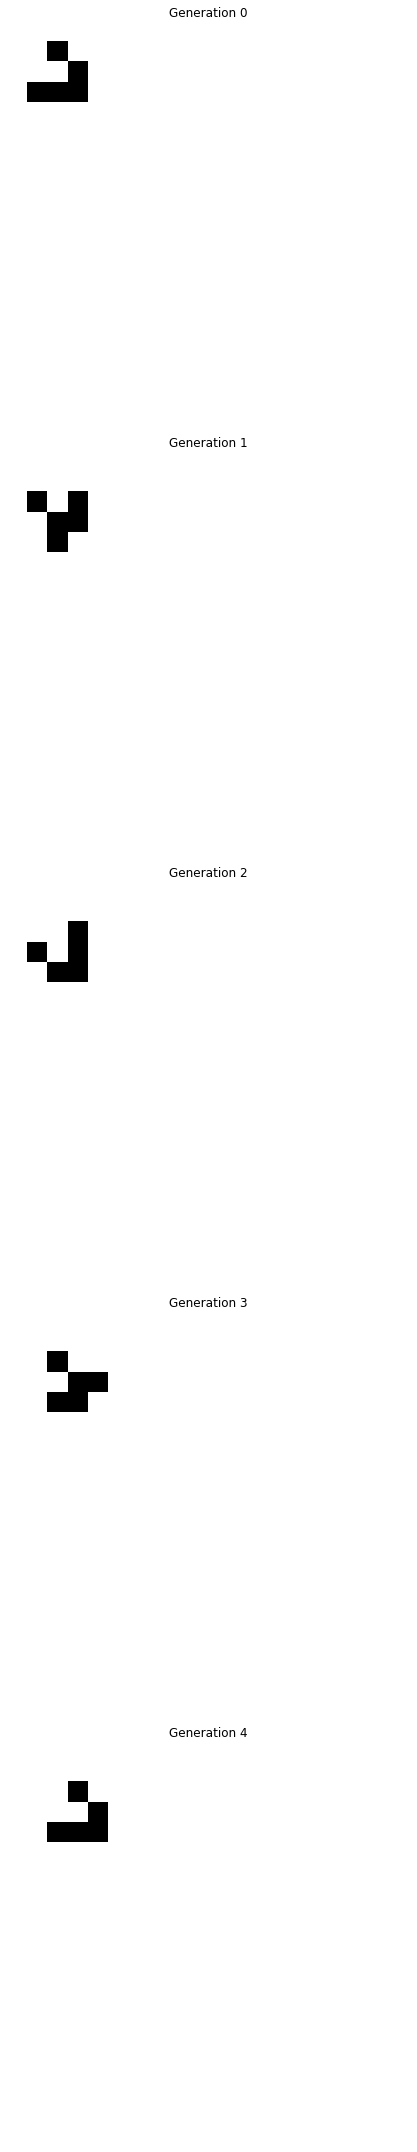

In [26]:
generations = [board]
for step in range(1, 5):
    next_gen = gol_step(generations[-1])
    generations.append(next_gen)
'''
for i, gen in enumerate(generations):
    print(f"\nGeneration {i}:")
    print(gen[:5, :5])
'''
def plot_generations(generations, rows=5, cols=1):
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6*rows))
    if cols == 1:
        axes = axes.reshape(-1)
    for i, (gen, ax) in enumerate(zip(generations, axes)):
        ax.imshow(gen, cmap='binary', interpolation='nearest')
        ax.set_title(f"Generation {i}", fontsize=12)
        ax.grid(False)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_generations(generations)


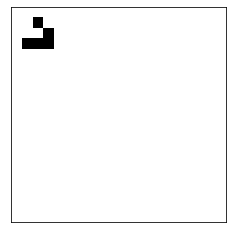

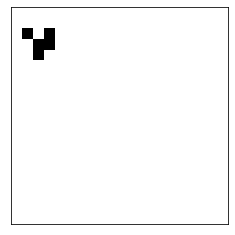

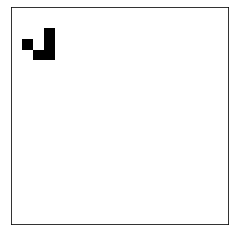

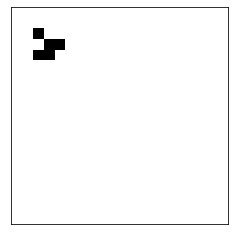

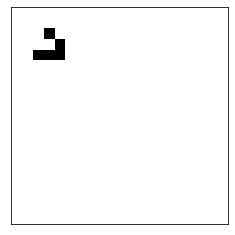

6. Create a function called draw_animation that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.

In [149]:
def draw_animation(M, n):
    from matplotlib.animation import FuncAnimation
    if not is_valid_board(M):
        raise ValueError("Invalid Game of Life board. The board must be a 2D NumPy array with all elements 0 or 1.")

    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = 'binary'  # 0 -> white, 1 -> black
    img = ax.imshow(M, cmap=cmap, interpolation='nearest')
    ax.grid(False)
    ax.axis('off')
    title = ax.set_title("Generation 0", fontsize=16)
    board = [M.copy()]

    def update(frame):
        board[0] = gol_step(board[0])
        img.set_data(board[0])
        title.set_text(f"Generation {frame}")
        return img, title

    anim = FuncAnimation(fig, update, frames=n, interval=100, blit=False)
    plt.show()


In [177]:
def draw_animation(M, n):
    from matplotlib.animation import FuncAnimation
    if not is_valid_board(M):
        raise ValueError("Invalid Game of Life board. The board must be a 2D NumPy array with all elements 0 or 1.")
   
    fig, ax = plt.subplots()
    cmap = 'binary'  # 0 -> white, 1 -> black
    img = ax.imshow(M, cmap=cmap, interpolation='nearest')
    ax.grid(False)
    ax.axis('off')
    ax.set_title("Generation 0", fontsize=16)

    def update(M):
        M = gol_step(M)
        img.set_data(M)
        print(M)
    anim = FuncAnimation(fig = fig, func = update, frames=n, interval=100)
    plt.show()

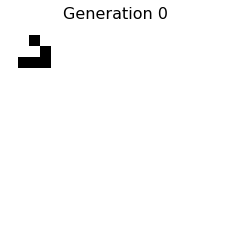

c:\Users\ed069\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [178]:
draw_animation(board,100)

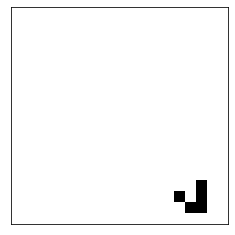

In [ ]:
draw_animation(a,100)